#Аникин Ф.А.
##ИУ5-14М
###Вариант 1

In [20]:
#pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

In [22]:
data = pd.read_csv('/content/stud_perf_exam.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


###Задача 1

In [24]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [30]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [26]:
# создание объекта CountEncoder
count = ce.CountEncoder()

# кодирование категориального признака
data['gender_count'] = count.fit_transform(data['gender'])

In [28]:
data['gender_count'].unique()

array([518, 482])

###Задача 21

RobustScaler вычитает из данных медиану и делит результат на интерквартильный размах (75% квантиль - 25% квантиль)

In [33]:
# создание объекта RobustScaler
scaler = RobustScaler()

# масштабирование данных
data['math_score_scaled'] = scaler.fit_transform(data[['math score']])

In [34]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_count,math_score_scaled
0,female,group B,bachelor's degree,standard,none,72,72,74,518,0.30
1,female,group C,some college,standard,completed,69,90,88,518,0.15
2,female,group B,master's degree,standard,none,90,95,93,518,1.20
3,male,group A,associate's degree,free/reduced,none,47,57,44,482,-0.95
4,male,group C,some college,standard,none,76,78,75,482,0.50


###Задание группы ИУ5-24М

Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

<Axes: xlabel='math score'>

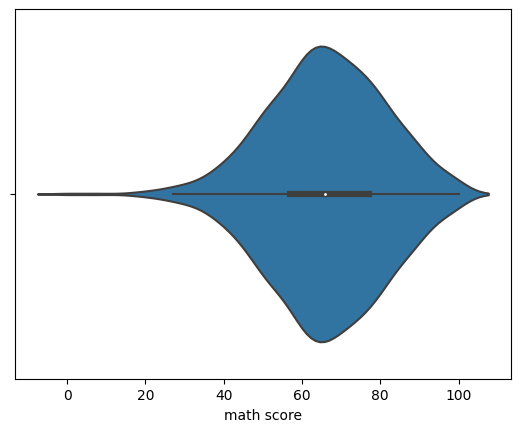

In [38]:
sns.violinplot(x='math score', data=data)